C:\Users\Programmer\AppData\Local\Temp\ipykernel_9628\2154816706.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)
c:\python\miniconda\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\python\miniconda\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


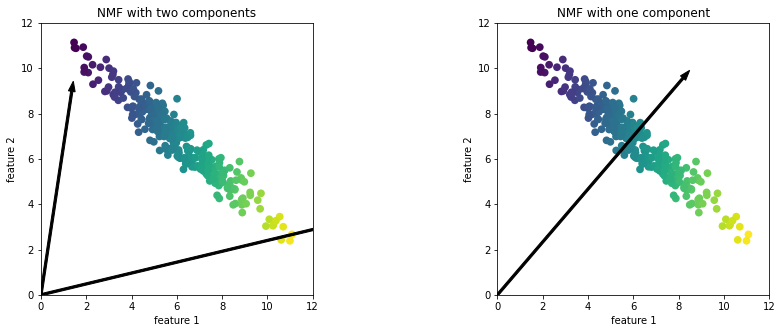

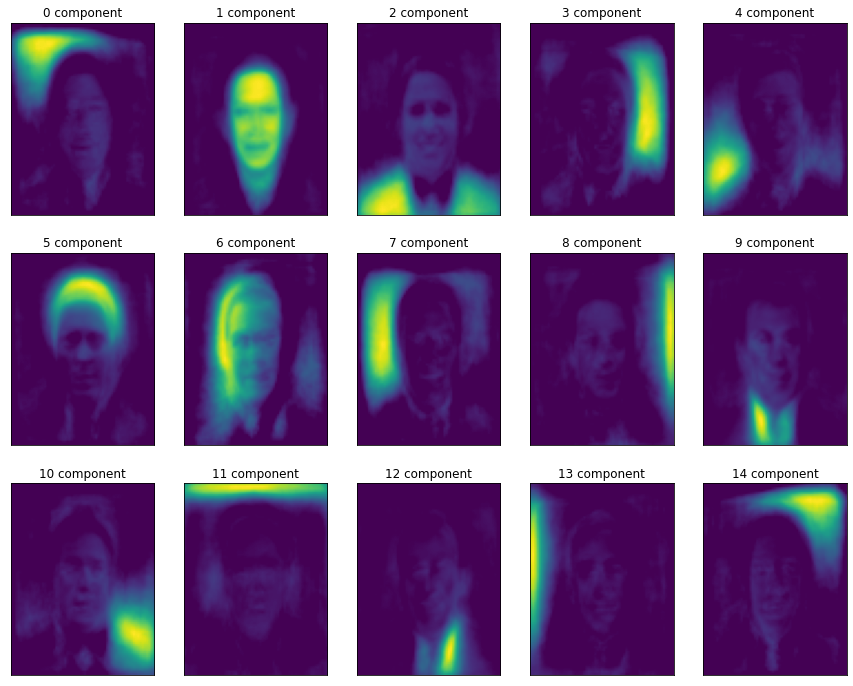

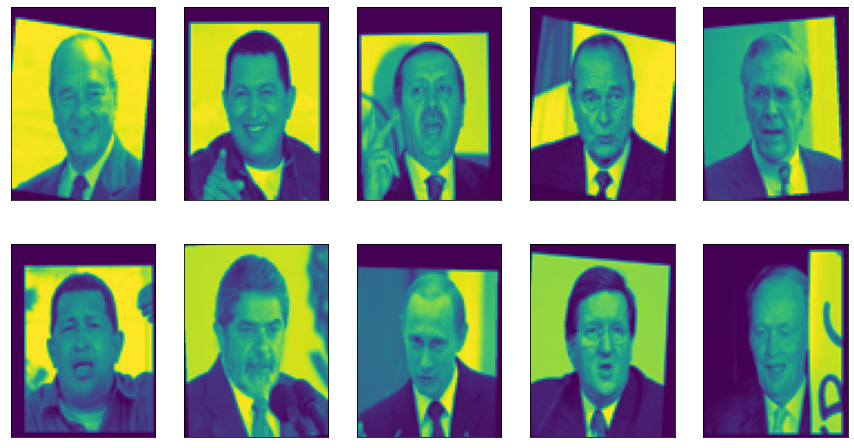

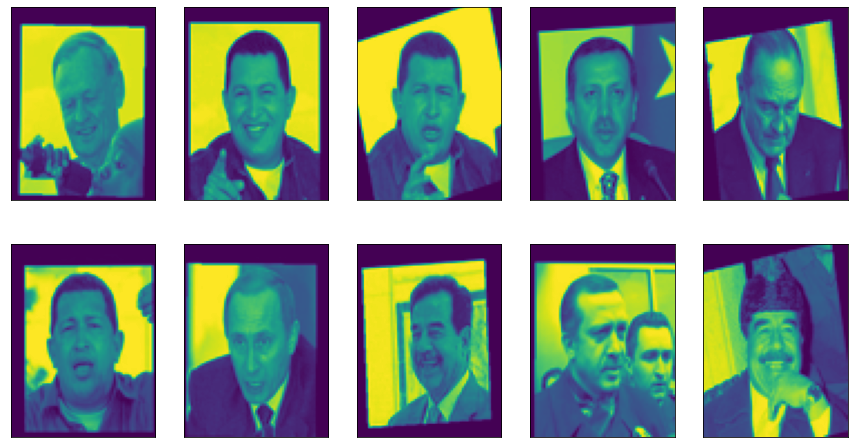

In [15]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

mglearn.plots.plot_nmf_illustration()
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)


nmf = NMF(n_components=15, random_state=0)

nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{} component".format(i))
#plot each face by component 3
compnt = 3

inds = np.argsort(X_train_nmf[:, compnt])[:: -1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Shape of measurements: (2000, 100)
Recovered signal shape: (2000, 3)


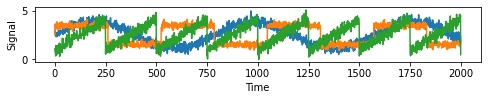

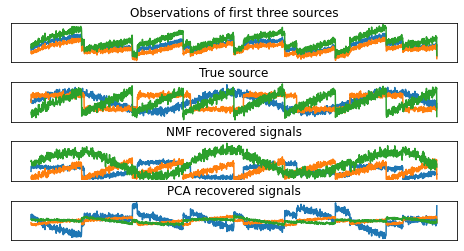

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, PCA
# from sklearn.datasets import make_signals

S = mglearn.datasets.make_signals()

plt.figure(figsize=(8, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

#mix data into 100 dimensional data

A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

# using NMF to recover individual signal
nmf = NMF(n_components=3, random_state=42)

S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

# for comparison with PCA
pca = PCA(n_components=3, random_state=42)
H = pca.fit_transform(X)

#printing them

models = [X, S, S_, H]
names = ["Observations of first three sources",
        "True source",
        "NMF recovered signals", 
        "PCA recovered signals"]
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
